#  San Francisco Crime Trends During the Stay-at-Home Order

## Data

The San Francisco Police Department gives the public access to their crime and arrest data on the federal data.gov sight. They have maintained the regular data updates even during the pandemic to report real-time statistics.

https://catalog.data.gov/dataset/police-department-incident-reports-2018-to-present

An overview  of the data and what values mean is given here: https://support.datasf.org/help/police-department-incident-reports-2018-to-present-overview



In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

### Loading in the data

In [2]:
SFPoliceReports = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")
print(SFPoliceReports.shape, SFPoliceReports.columns)
SFPoliceReports.head()

(343550, 36) Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/05/07 12:43:00 PM,2020/05/07,12:43,2020,Thursday,2020/05/07 12:43:00 PM,92532168020,925321,200281799,201281728.0,...,58.0,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2020/05/07 12:40:00 PM,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525112130,925251,200263311,201281786.0,...,108.0,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0
2,2020/05/07 12:40:00 PM,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,108.0,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0
3,2020/05/07 12:40:00 PM,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,108.0,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0
4,2020/05/07 12:35:00 PM,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,19.0,6.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0


In [3]:
#SFPoliceReports.dtypes

#### Adding  a Month Column to the Data

In [4]:
SFPoliceReports["Incident Datetime"] = pd.to_datetime(SFPoliceReports["Incident Datetime"])
SFPoliceReports["Month"] = SFPoliceReports["Incident Datetime"].dt.month
#SFPoliceReports.dtypes

#### Seeing what Police Districts have the most arrests

In [5]:
SFPoliceReports["Police District"].value_counts()

Central       53379
Northern      46090
Mission       46064
Southern      43035
Tenderloin    33634
Bayview       28007
Ingleside     24367
Taraval       23259
Richmond      20297
Park          16097
Out of SF      9321
Name: Police District, dtype: int64

In [6]:
#SFPoliceReports["SF Find Neighborhoods"].value_counts()

#### Visualizing what Neighborhoods have the most arrests

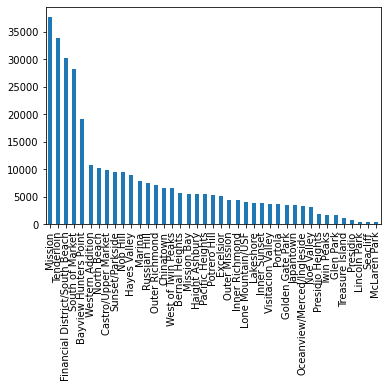

In [7]:
SFPoliceReports["Analysis Neighborhood"].value_counts().plot.bar()

#### Seeing what days have the highest police reports 

In [8]:
SFPoliceReports["Incident Datetime"].value_counts().head(30)

2018-01-01 00:00:00    50
2019-01-01 00:00:00    48
2018-02-01 00:00:00    46
2018-08-01 00:00:00    46
2018-06-01 00:00:00    44
2019-04-01 00:00:00    44
2019-05-24 12:00:00    43
2019-02-25 14:00:00    42
2018-09-08 17:00:00    41
2018-07-01 00:00:00    38
2019-05-01 00:00:00    37
2018-06-01 12:00:00    37
2020-02-14 19:00:00    37
2018-05-01 00:00:00    36
2019-10-10 12:00:00    35
2019-02-01 00:00:00    35
2019-06-01 00:00:00    32
2019-07-01 00:00:00    32
2018-04-01 00:00:00    32
2018-09-20 12:00:00    31
2018-09-01 00:00:00    31
2019-05-28 12:00:00    31
2018-07-01 12:00:00    30
2019-02-02 12:10:00    29
2018-10-01 00:00:00    29
2019-02-01 12:00:00    29
2018-10-01 12:00:00    29
2019-04-01 12:00:00    28
2019-09-01 00:00:00    27
2018-05-01 12:00:00    27
Name: Incident Datetime, dtype: int64

#### New Years Day, and the first of the months have the highest number of police reports 

In [9]:
#SFPoliceReports[SFPoliceReports["Incident Datetime"] == "2020/02/14 07:00:00 PM"]['Incident Description']

In [10]:
SFPoliceReports.head() #see my  month column

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month
0,2020-05-07 12:43:00,2020/05/07,12:43,2020,Thursday,2020/05/07 12:43:00 PM,92532168020,925321,200281799,201281728.0,...,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0,5
1,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525112130,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
2,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
3,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
4,2020-05-07 12:35:00,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,6.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0,5


In [11]:
SFPoliceReports.shape

(343550, 37)

### Next 6 blocks are making sure the 2018 & 2019 Data only go  until May 7th as well, to make  it uniform with 2020

In [12]:
interestingmonths = [1,2,3,4,5] #because I only have through May data for 2020
criteria = SFPoliceReports["Month"].isin(interestingmonths)
janmayfull = SFPoliceReports[criteria]
janmayfull.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month
0,2020-05-07 12:43:00,2020/05/07,12:43,2020,Thursday,2020/05/07 12:43:00 PM,92532168020,925321,200281799,201281728.0,...,9.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,2.0,5
1,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525112130,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
2,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
3,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,1.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5
4,2020-05-07 12:35:00,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,6.0,3.0,21.0,NaN,NaN,NaN,NaN,NaN,2.0,5


In [13]:
janmayfull.dtypes
janmayfull.shape

(163155, 37)

In [14]:
SFPoliceJanMay =  janmayfull.drop(janmayfull[(janmayfull["Incident Datetime"] >= datetime.datetime(2019, 5, 8)) & (janmayfull["Incident Datetime"] < datetime.datetime(2019, 12, 5))].index)
SFPoliceJanMay =  SFPoliceJanMay.drop(SFPoliceJanMay[(SFPoliceJanMay["Incident Datetime"] >= datetime.datetime(2018, 5, 8)) & (SFPoliceJanMay["Incident Datetime"] < datetime.datetime(2018, 12, 5))].index)
                        #df.drop(df         [(df.score                        < 50                            ) & (df.score > 20)].index)
SFPoliceJanMay.shape
    

(143714, 37)

In [15]:
SFPoliceJanMay[SFPoliceJanMay["Incident Date"] == "2018/05/07"].head(3) #checking to may 7th of each year

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month
290446,2018-05-07 12:55:00,2018/05/07,12:55,2018,Monday,2018/05/09 11:32:00 AM,66779806372,667798,186108041,NaN,...,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0,5
290447,2018-05-07 12:50:00,2018/05/07,12:50,2018,Monday,2018/05/07 12:56:00 PM,66559764070,665597,180339200,181272038.0,...,5.0,3.0,8.0,NaN,35.0,NaN,NaN,NaN,2.0,5
290448,2018-05-07 12:49:00,2018/05/07,12:49,2018,Monday,2018/05/07 12:57:00 PM,66562851040,665628,180339125,181272005.0,...,1.0,3.0,8.0,4.0,NaN,NaN,NaN,NaN,1.0,5


In [16]:
SFPoliceJanMay[SFPoliceJanMay["Incident Date"] == "2018/05/08"] #checking to may 7th of each year,  should be empty

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month


### Making a Month/Day column

In [17]:
SFPoliceJanMay["Day"] = SFPoliceJanMay["Incident Datetime"].dt.day
SFPoliceJanMay["Day"] = SFPoliceJanMay["Day"].astype(str)
SFPoliceJanMay["Month"] = SFPoliceJanMay["Month"].astype(str)
#SFPoliceJanMay.dtypes

In [18]:
SFPoliceJanMay["Month/Day"] = SFPoliceJanMay["Month"] + "/" + SFPoliceJanMay["Day"]
SFPoliceJanMay7day = SFPoliceJanMay

In [19]:
SFPoliceJanMay.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Day,Month/Day
0,2020-05-07 12:43:00,2020/05/07,12:43,2020,Thursday,2020/05/07 12:43:00 PM,92532168020,925321,200281799,201281728.0,...,7.0,NaN,NaN,NaN,NaN,NaN,2.0,5,7,5/7
1,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525112130,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
2,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
3,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
4,2020-05-07 12:35:00,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,21.0,NaN,NaN,NaN,NaN,NaN,2.0,5,7,5/7


In [20]:
#SFPoliceJanMay.to_csv("SFPoliceJanMay.csv") more saving to csv files to work with in Tableau

### Tableau Link! From the above data frame  I constructed this cool Map visualization!

https://public.tableau.com/profile/julia2053#!/vizhome/6TopCrimes2018-2020SanFranciscoJan01-May07/Dashboard1

In [21]:
SFPoliceJanMay7daycsvfile = SFPoliceJanMay7day.groupby(["Incident Year", "Month/Day"]).count().iloc[:,0:1].rename(columns = {"Incident Datetime": "Number of  Crimes"})# .to_csv("SFPoliceJanMay7day.csv")
SFPoliceJanMay7daycsvfile


Number of  Crimes
Incident Year Month/Day                   
2018          1/1                      508
              1/10                     419
              1/11                     421
              1/12                     467
              1/13                     441
...                                    ...
2020          5/3                      198
              5/4                      241
              5/5                      262
              5/6                      186
              5/7                      116

[382 rows x 1 columns]

In [22]:
#SFPoliceJanMay7day.to_csv("SFPoliceJanMay7day.csv")

#### Apparent trend in this following data frame that I wanted to show with a visualization in Tableau

In [23]:
SFPoliceJanMay.groupby(["Incident Year", "Month"]).count().iloc[:,0:1].rename(columns = {"Incident Datetime": "Number of  Crimes"})

Number of  Crimes
Incident Year Month                   
2018          1                  13322
              2                  11820
              3                  12510
              4                  12503
              5                   2949
2019          1                  12126
              2                  10978
              3                  11804
              4                  11801
              5                   2847
2020          1                  12000
              2                  11194
              3                   9030
              4                   7384
              5                   1446

In [24]:
SFCrimesperDay = SFPoliceJanMay.groupby(["Incident Year", "Incident Date"]).count().iloc[:,0:1].rename(columns = {"Incident Datetime": "Number of  Crimes"})
#SFCrimesperDay.to_csv("SFCrimesperDay.csv")
SFCrimesperDay


Number of  Crimes
Incident Year Incident Date                   
2018          2018/01/01                   508
              2018/01/02                   398
              2018/01/03                   430
              2018/01/04                   472
              2018/01/05                   454
...                                        ...
2020          2020/05/03                   198
              2020/05/04                   241
              2020/05/05                   262
              2020/05/06                   186
              2020/05/07                   116

[382 rows x 1 columns]

In [25]:
SFPoliceJanMay

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Day,Month/Day
0,2020-05-07 12:43:00,2020/05/07,12:43,2020,Thursday,2020/05/07 12:43:00 PM,92532168020,925321,200281799,201281728.0,...,7.0,NaN,NaN,NaN,NaN,NaN,2.0,5,7,5/7
1,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525112130,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
2,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
3,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
4,2020-05-07 12:35:00,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,21.0,NaN,NaN,NaN,NaN,NaN,2.0,5,7,5/7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343545,2018-01-01 01:00:00,2018/01/01,01:00,2018,Monday,2018/01/03 12:58:00 PM,61977304013,619773,180006578,180031940.0,...,5.0,5.0,NaN,NaN,NaN,NaN,1.0,1,1,1/1
343546,2018-01-01 01:00:00,2018/01/01,01:00,2018,Monday,2018/01/01 03:12:00 AM,61925328150,619253,186000146,NaN,...,34.0,NaN,NaN,NaN,NaN,NaN,2.0,1,1,1/1
343547,2018-01-01 01:00:00,2018/01/01,01:00,2018,Monday,2018/01/02 03:14:00 PM,61937827068,619378,180004099,180022482.0,...,34.0,1.0,NaN,1.0,NaN,NaN,2.0,1,1,1/1
343548,2018-01-01 01:00:00,2018/01/01,01:00,2018,Monday,2018/01/01 09:18:00 AM,62069706244,620697,186002891,NaN,...,41.0,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1/1


### Looking at crimes grouped by month and year

In [26]:
#SFPoliceJanMay.groupby(["Incident Year", "Month",  "Incident Category"]).count().iloc[:,0:1] #.to_csv("SFCommonCrimesperYearandMonth.csv")


### Tableau Link! From the above data frame  I constructed this visualization

https://public.tableau.com/profile/julia2053#!/vizhome/SanFranciscos6TopCrimeTrendsbyYear/Dashboard2

#### Seeing what  crimes are most frequently reported in San Francisco

In [27]:
SFPoliceJanMay["Incident Category"].value_counts()

Larceny Theft                                 43369
Other Miscellaneous                           11238
Malicious Mischief                             9090
Non-Criminal                                   8970
Assault                                        8465
Burglary                                       6980
Motor Vehicle Theft                            5474
Warrant                                        5191
Lost Property                                  4967
Recovered Vehicle                              4386
Fraud                                          4249
Drug Offense                                   3769
Missing Person                                 3344
Robbery                                        3344
Offences Against The Family And Children       2847
Suspicious Occ                                 2833
Disorderly Conduct                             2594
Traffic Violation Arrest                       1948
Miscellaneous Investigation                    1345
Other Offens

#### Filter to the top crimes, leaving out the outlier of Larceny Theft

In [28]:
crimefilter = [ "Other Miscellaneous", "Malicious Mischief", "Non-Criminal", "Assault",                                   
            'Burglary', 'Motor Vehicle Theft', 'Warrant', 'Lost Property', 'Recovered Vehicle' ]  
criteria = SFPoliceJanMay["Incident Category"].isin(crimefilter)
SF2_10crimes = SFPoliceJanMay[criteria] #didnt include Larceny Theft  because its an outlier
SF2_10crimes.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016",Month,Day,Month/Day
2,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525163010,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
3,2020-05-07 12:40:00,2020/05/07,12:40,2020,Thursday,2020/05/07 12:44:00 PM,92525127170,925251,200263311,201281786.0,...,8.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
4,2020-05-07 12:35:00,2020/05/07,12:35,2020,Thursday,2020/05/07 01:20:00 PM,92524307021,925243,200281777,201281917.0,...,21.0,NaN,NaN,NaN,NaN,NaN,2.0,5,7,5/7
5,2020-05-07 12:26:00,2020/05/07,12:26,2020,Thursday,2020/05/07 12:26:00 PM,92524463010,925244,190547459,201281718.0,...,26.0,NaN,NaN,NaN,NaN,NaN,1.0,5,7,5/7
8,2020-05-07 11:47:00,2020/05/07,11:47,2020,Thursday,2020/05/07 11:47:00 AM,92528664085,925286,200281595,201281581.0,...,34.0,NaN,35.0,NaN,NaN,NaN,2.0,5,7,5/7


#### Basic Data Visualizations

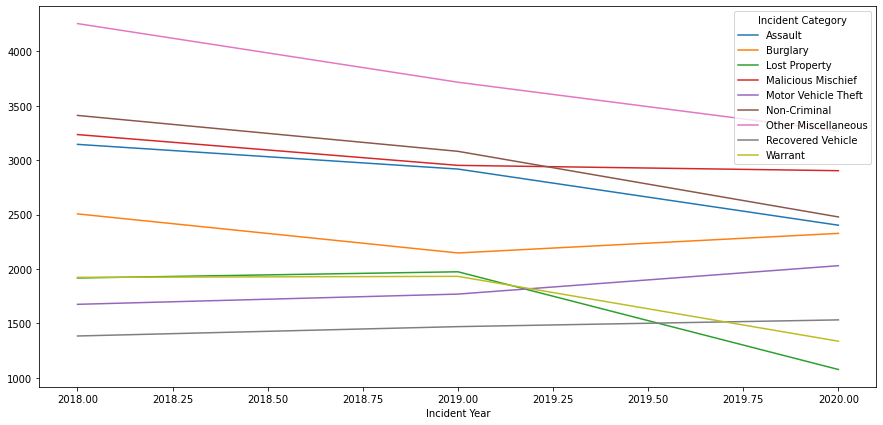

In [29]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
SF2_10crimes.groupby(["Incident Year", "Incident Category"]).count()['Incident Datetime'].unstack().plot(ax=ax)

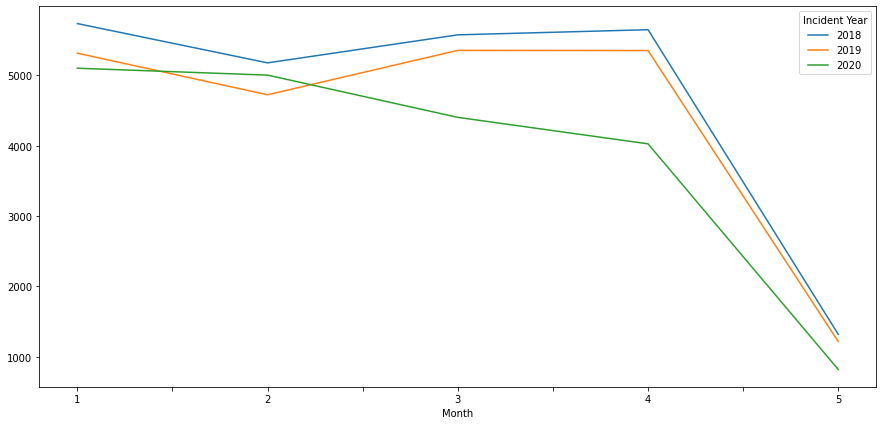

In [30]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
SF2_10crimes.groupby(["Month", "Incident Year"]).count()['Incident Datetime'].unstack().plot(ax=ax)

## More Data

The LA Times Data Desk team has taken the lead to centralize Los Angeles based COVID-19 related datasets. Shortly after the pandemic erupted in the US, they have maintained the following page to report real-time statistics.

https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/

In order to maintain transparency over their methods, they have made multiple datasets available on this GitHub page, allowing academics to use it for research purposes under these terms and services (https://www.latimes.com/terms-of-service).

https://github.com/datadesk/california-coronavirus-data

In [31]:
latimes = pd.read_csv(
    "https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv"
)

In [32]:
latimes  #march 16-may 13

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-03-16,Los Angeles,37,Alhambra,2,NaN,-118.135504,34.083961
1,2020-03-16,Los Angeles,37,Arcadia,1,NaN,-118.037297,34.134186
2,2020-03-16,Los Angeles,37,Beverly Hills,1,NaN,-118.402109,34.078543
3,2020-03-16,Los Angeles,37,Boyle Heights,5,NaN,-118.205330,34.038150
4,2020-03-16,Los Angeles,37,Carson,1,NaN,-118.255878,33.837391
...,...,...,...,...,...,...,...,...
30601,2020-05-13,Ventura,111,Santa Paula,50,NaN,-119.061497,34.353092
30602,2020-05-13,Ventura,111,Simi Valley,184,NaN,-118.750410,34.271008
30603,2020-05-13,Ventura,111,Somis,3,NaN,-118.994592,34.263681
30604,2020-05-13,Ventura,111,Thousand Oaks,102,NaN,-118.839304,34.172478


In [33]:
sfconfirmedcases = latimes[latimes["county"] == "San Francisco"].groupby("date").sum().iloc[:, 1:2]
sfconfirmedcases

,confirmed_cases
date,
2020-04-20,1129
2020-04-21,1151
2020-04-23,1227
2020-04-24,1266
2020-04-25,1282
2020-04-26,1319
2020-04-27,1332
2020-04-28,1360
2020-04-29,1394


In [34]:
len(datestoadd)


NameError: name 'datestoadd' is not defined

In [35]:
datestoadd = ["4/20","4/21", "4/23", "4/24", "4/25", "4/26", "4/27", "4/28", "4/29", "4/30", "5/1", "5/2", "5/3", "5/4", "5/5", "5/6", "5/7", "5/8", "5/9", "5/10", "5/11", "5/12", "5/13"]
sfconfirmedcases["Month/Day"] = datestoadd
sfconfirmedcases



,confirmed_cases,Month/Day
date,,
2020-04-20,1129,4/20
2020-04-21,1151,4/21
2020-04-23,1227,4/23
2020-04-24,1266,4/24
2020-04-25,1282,4/25
2020-04-26,1319,4/26
2020-04-27,1332,4/27
2020-04-28,1360,4/28
2020-04-29,1394,4/29


In [36]:
crimesandcasessf = pd.merge(SFPoliceJanMay7daycsvfile, sfconfirmedcases[["confirmed_cases", "Month/Day"]], on = "Month/Day", how = "left" )
crimesandcasessf


,Month/Day,Number of Crimes,confirmed_cases
0,1/1,508,NaN
1,1/10,419,NaN
2,1/11,421,NaN
3,1/12,467,NaN
4,1/13,441,NaN
...,...,...,...
377,5/3,198,1499.0
378,5/4,241,1512.0
379,5/5,262,1597.0
380,5/6,186,1612.0


In [37]:
382/3

127.33333333333333

In [38]:
yearstoadd = np.concatenate((np.repeat(2018, 127), np.repeat(2019, 127), np.repeat(2020, 128)),  axis = None)

In [39]:
crimesandcasessf["Year"] = yearstoadd

In [42]:
crimesandcasessf

,Month/Day,Number of Crimes,confirmed_cases,Year
0,1/1,508,NaN,2018
1,1/10,419,NaN,2018
2,1/11,421,NaN,2018
3,1/12,467,NaN,2018
4,1/13,441,NaN,2018
...,...,...,...,...
377,5/3,198,1499.0,2020
378,5/4,241,1512.0,2020
379,5/5,262,1597.0,2020
380,5/6,186,1612.0,2020


In [43]:
crimesandcasessf["confirmed_cases"][0:254] = np.nan #when I merged it applied data to  2018/2019 that wasnt' accurate
#so just correcting it


<ipython-input-43-0d4e1766b26c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesandcasessf["confirmed_cases"][0:254] = np.nan #when I merged it applied data to  2018/2019 that wasnt' accurate


In [44]:
#crimesandcasessf["confirmed_cases"][330:]

In [45]:
#crimesandcasessf.to_csv("crimesandcasessf.csv")

In [46]:
crimesandcasessf

,Month/Day,Number of Crimes,confirmed_cases,Year
0,1/1,508,NaN,2018
1,1/10,419,NaN,2018
2,1/11,421,NaN,2018
3,1/12,467,NaN,2018
4,1/13,441,NaN,2018
...,...,...,...,...
377,5/3,198,1499.0,2020
378,5/4,241,1512.0,2020
379,5/5,262,1597.0,2020
380,5/6,186,1612.0,2020


### Tableau Link! From the above data frame  I constructed this visualization

https://public.tableau.com/profile/julia2053#!/vizhome/SanFranciscoCrimeandCoronavirus/Dashboard1

## Tableau Links To Data Visualizations

I have a public Tableau Profile where I upload my code. All the San Francisco ones, are specific to this  data project. The other coronavirus ones were just my  own ecploration with tabelau and covid-19  data. I also have them linked throughout this jupyter notebook, by the data  frames I used to construct the visualizations. 

This link is crime Jan 01- May 07 for 2018-2020 with the confirmed coronvirus cases added. 

https://public.tableau.com/profile/julia2053#!/vizhome/SanFranciscoCrimeandCoronavirus/Dashboard1

This link is looking at how the top 6 crimes frequency has been affected by San Francisco's Stay-at-Home order.

https://public.tableau.com/profile/julia2053#!/vizhome/SanFranciscos6TopCrimeTrendsbyYear/Dashboard2

This link is a map of the top 6 most frequent crimes in San Francisco from 2018-2020 in the months Jan - May 07.

https://public.tableau.com/profile/julia2053#!/vizhome/6TopCrimes2018-2020SanFranciscoJan01-May07/Dashboard1

This link is crime Jan 01- May 07 for 2018-2020.

https://public.tableau.com/profile/julia2053#!/vizhome/SanFrancisco2018-2020CrimeChangeJan01-May07/Dashboard1